# Students Grade Prediction

В [датасете](https://archive.ics.uci.edu/ml/datasets/student+performance) собраны данные старшеклассников школ в Португалии. Таргет - G3, финальная оценка ученика - коррелирует с G1 и G2 (оценками за первый и второй год обучения). В описании датасета говорится, что гораздо полезнее (но сложнее) предсказывать G3 независимо от G1 и G2. G1, G2, G3 принимают значения от 0 до 20 баллов.

In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
data = pd.read_csv('student-mat.csv')

In [ ]:
df = pd.DataFrame(data)
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


Повезло, что нет нулевых значений, нет численных колонок, сохранённых, как объекты:

In [ ]:
df.info()

Различные статистики: в среднем возраст - ~17 лет, ~6 пропусков, G1 выше, чем G2, а G2 выше, чем G3...

In [ ]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


Сделала Series, в котором удобно смотреть значения колонок:

In [ ]:
from a import a
col_descr = pd.Series(data=a, index=df.columns[:30])
col_descr['goout']

'goout - going out with friends (numeric: from 1 - very low to 5 - very high)'

## EDA

Посмотрим на распределение целевой переменной:

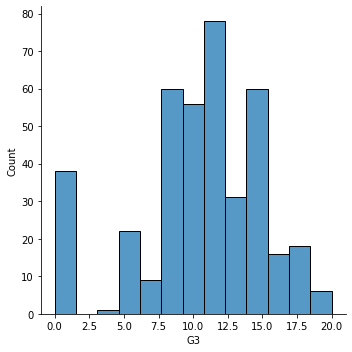

In [ ]:
sns.displot(df['G3'])

*Здесь я пытаюсь выяснить, почему ~40 человек из 395 написали на ноль баллов.*
*Выбрать тех, у кого G3 < 5 и посмотреть зависимость от других признаков*



Большинству учеников 16-17 лет, девочек немногим больше мальчиков:

*Здесь я пытаюсь выяснить, почему некоторым студентам ~20 лет. Посмотреть, что у них со здоровьем, учебой, какой балл G3.*

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


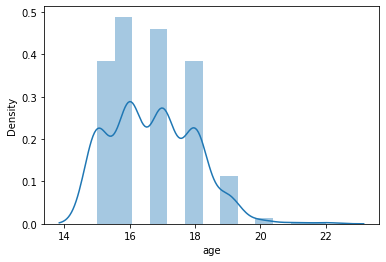

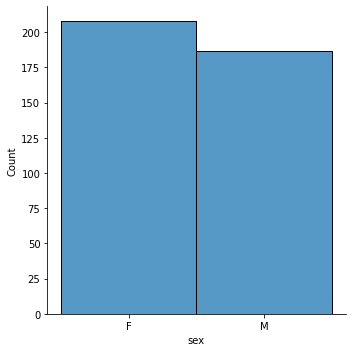

In [ ]:
sns.distplot(df['age'])
sns.displot(df['sex'])

Можно посмотреть корреляцию G3 со всеми остальными колонками (численными) с помощью функции pandas corr(), которую я подсмотрела на Хабре. По дефолту считается pearson. Как и было заявлено в описании, общий балл за 1 и 2 годы обучения сильно связаны с баллом за третий год. Количество проваленных курсов, здоровье имеют негативную корреляцию с G3. Итоговый балл положительно коррелирует с образованием родителей, временем, посвященном учебе.

In [ ]:
df.corr()['G3'].sort_values()

failures     -0.360415
age          -0.161579
goout        -0.132791
traveltime   -0.117142
health       -0.061335
Dalc         -0.054660
Walc         -0.051939
freetime      0.011307
absences      0.034247
famrel        0.051363
studytime     0.097820
Fedu          0.152457
Medu          0.217147
G1            0.801468
G2            0.904868
G3            1.000000
Name: G3, dtype: float64

## Выбор признаков

Преобразуем колонки типа object в численные значения

In [ ]:
df_ = df.copy()
#численный не трогаем
df_num = df.select_dtypes('number')
#заменяем категориальные данные на численные
df_cat = pd.get_dummies(df[['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic']])
#объединяем в df_
df_ = pd.concat([df_num, df_cat], axis = 1)
df_.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,schoolsup_no,schoolsup_yes,famsup_no,famsup_yes,paid_no,paid_yes,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,1,3,6,5,6,6,1,0,1,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0,1,0
1,17,1,1,1,2,0,5,3,3,1,1,3,4,5,5,6,1,0,1,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0
2,15,1,1,1,2,3,4,3,2,2,3,3,10,7,8,10,1,0,1,0,0,1,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,15,4,2,1,3,0,3,2,2,1,1,5,2,15,14,15,1,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,1,2,5,4,6,10,10,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,1,0


Было 33 колонки, стало 59.

In [ ]:
df_.corr()['higher_no'].sort_values()

higher_yes          -1.000000
paid_yes            -0.189214
G3                  -0.182465
G2                  -0.179129
G1                  -0.178264
studytime           -0.175081
Fedu                -0.174566
Medu                -0.168845
sex_F               -0.151056
romantic_no         -0.105664
famsup_yes          -0.100815
activities_yes      -0.096484
reason_reputation   -0.086686
Mjob_health         -0.070874
reason_home         -0.065072
Mjob_teacher        -0.063183
schoolsup_yes       -0.054486
nursery_yes         -0.054303
Fjob_health         -0.050462
Fjob_other          -0.046121
address_U           -0.042854
Pstatus_A           -0.040735
famrel              -0.024319
school_GP           -0.024150
Fjob_teacher        -0.020735
internet_yes        -0.020374
guardian_father     -0.015333
famsize_GT3         -0.005806
Mjob_services       -0.005660
Mjob_other          -0.003356
Fjob_at_home        -0.000667
guardian_mother      0.004429
famsize_LE3          0.005806
health    

Просто руками проверила корреляцию между некоторыми колонками (не с таргетом). Вроде бы нет нигде выше 0.4, посмотрим, что скажет Lasso

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


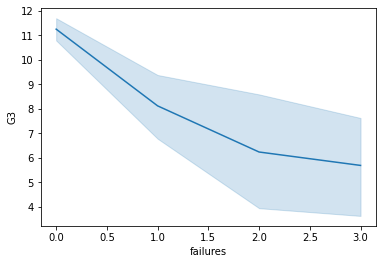

In [ ]:
#кто не проваливал курсы, у того G3 выше среднего (средний около 10.4), отрицательная корреляция
sns.lineplot(df_.failures, df.G3)

In [ ]:
df_.corr()['G3'].sort_values()

failures            -0.360415
higher_no           -0.182465
age                 -0.161579
goout               -0.132791
romantic_yes        -0.129970
traveltime          -0.117142
Mjob_at_home        -0.115634
address_R           -0.105756
sex_F               -0.103456
paid_no             -0.101996
reason_course       -0.098950
internet_no         -0.098483
Mjob_other          -0.096477
guardian_other      -0.087774
schoolsup_yes       -0.082788
famsize_GT3         -0.081407
health              -0.061335
Pstatus_T           -0.058009
Dalc                -0.054660
Fjob_other          -0.053483
Walc                -0.051939
nursery_no          -0.051568
school_MS           -0.045017
famsup_yes          -0.039157
reason_home         -0.021359
Fjob_services       -0.016108
activities_no       -0.016100
Fjob_at_home        -0.013385
freetime             0.011307
activities_yes       0.016100
guardian_mother      0.022338
guardian_father      0.032493
absences             0.034247
famsup_no 

## Построение модели

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression, Lasso, Ridge,ElasticNet, LassoCV 

### Разбиваем данные

In [ ]:
# Отделяем таргет
X = df_.drop(columns='G3')
y = pd.DataFrame(df_['G3'])
# Разбиваем на train и test сеты (80% на трейн, 20% на тест)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print('Тренировочные признаки: ', X_train.shape, 'Тренировочные таргеты: ', y_train.shape, 'Тестовые признаки: ', X_test.shape, 'Тестовые таргеты: ', y_test.shape)

Тренировочные признаки:  (316, 58) Тренировочные таргеты:  (316, 1) Тестовые признаки:  (79, 58) Тестовые таргеты:  (79, 1)


### Тренируем

In [ ]:
import numpy as np

**1. LinearRegression()**

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)
print('Пересечение: ', lr.intercept_)
names = []
for j in lr.coef_:
  for k in j:
    names.append(np.round(k, 2))
# Мои дамми-вэриаблы (выше превращала категориальные данные в числовые) сделали мне мульти-коллинеарность. Насколько я поняла, это распространенная проблема.
coefs = {x:y for x,y in zip(X_train.columns, names)}
print(coefs)
print(f'Качество при обучении {lr.score(X_train, y_train).round(2)}, качество на отложенной выборке {lr.score(X_test, y_test).round(2)}')


Пересечение:  [6.25947167e+12]
{'age': -0.12, 'Medu': 0.22, 'Fedu': -0.17, 'traveltime': 0.08, 'studytime': -0.21, 'failures': -0.09, 'famrel': 0.42, 'freetime': -0.06, 'goout': 0.1, 'Dalc': -0.38, 'Walc': 0.17, 'health': 0.16, 'absences': 0.04, 'G1': 0.21, 'G2': 0.95, 'school_GP': -1772059550626.5, 'school_MS': -1772059550625.87, 'sex_F': 733745930456.01, 'sex_M': 733745930456.3, 'address_R': -2045078542432.8, 'address_U': -2045078542432.59, 'famsize_GT3': -95316230594.54, 'famsize_LE3': -95316230594.39, 'Pstatus_A': 59374788909.93, 'Pstatus_T': 59374788909.68, 'Mjob_at_home': 401901386504.52, 'Mjob_health': 401901386504.21, 'Mjob_other': 401901386504.7, 'Mjob_services': 401901386504.36, 'Mjob_teacher': 401901386504.12, 'Fjob_at_home': -950965799592.46, 'Fjob_health': -950965799592.06, 'Fjob_other': -950965799592.52, 'Fjob_services': -950965799592.86, 'Fjob_teacher': -950965799592.59, 'reason_course': -883199203743.42, 'reason_home': -883199203743.68, 'reason_other': -883199203743.0, 

**2. Lasso**

In [ ]:
lass = Lasso(alpha = 0.01)
lass.fit(X_train, y_train)
print('Пересечение: ', lass.intercept_)
names = []
for j in lass.coef_:
  names.append(np.round(j, 2))
coefs = {x:y for x,y in zip(X_train.columns, names)}
print(coefs)
print(f'Качество при обучении {lass.score(X_train, y_train).round(2)}, качество на отложенной выборке {lass.score(X_test, y_test).round(2)}')

Пересечение:  [-1.70449955]
{'age': -0.12, 'Medu': 0.14, 'Fedu': -0.12, 'traveltime': 0.05, 'studytime': -0.18, 'failures': -0.09, 'famrel': 0.41, 'freetime': -0.04, 'goout': 0.09, 'Dalc': -0.31, 'Walc': 0.14, 'health': 0.14, 'absences': 0.04, 'G1': 0.2, 'G2': 0.96, 'school_GP': -0.46, 'school_MS': 0.0, 'sex_F': -0.16, 'sex_M': 0.0, 'address_R': -0.07, 'address_U': 0.0, 'famsize_GT3': -0.09, 'famsize_LE3': 0.0, 'Pstatus_A': 0.17, 'Pstatus_T': -0.0, 'Mjob_at_home': 0.0, 'Mjob_health': -0.0, 'Mjob_other': 0.24, 'Mjob_services': 0.0, 'Mjob_teacher': -0.11, 'Fjob_at_home': 0.0, 'Fjob_health': 0.23, 'Fjob_other': 0.0, 'Fjob_services': -0.36, 'Fjob_teacher': -0.0, 'reason_course': -0.02, 'reason_home': -0.26, 'reason_other': 0.22, 'reason_reputation': 0.02, 'guardian_father': -0.02, 'guardian_mother': 0.23, 'guardian_other': 0.0, 'schoolsup_no': -0.44, 'schoolsup_yes': 0.0, 'famsup_no': -0.21, 'famsup_yes': 0.0, 'paid_no': -0.03, 'paid_yes': 0.0, 'activities_no': 0.36, 'activities_yes': -0.0

**3. ElasticNet**

In [ ]:
el = ElasticNet(alpha = 0.01, l1_ratio = 0.9)
el.fit(X_train, y_train)
print('Пересечение: ', el.intercept_)
names = []
for j in el.coef_:
  names.append(np.round(j, 2))
coefs = {x:y for x,y in zip(X_train.columns, names)}
print(coefs)
print(f'Качество при обучении {el.score(X_train, y_train).round(2)}, качество на отложенной выборке {el.score(X_test, y_test).round(2)}')

Пересечение:  [-1.86580028]
{'age': -0.12, 'Medu': 0.14, 'Fedu': -0.13, 'traveltime': 0.06, 'studytime': -0.18, 'failures': -0.09, 'famrel': 0.41, 'freetime': -0.04, 'goout': 0.09, 'Dalc': -0.31, 'Walc': 0.15, 'health': 0.14, 'absences': 0.04, 'G1': 0.2, 'G2': 0.96, 'school_GP': -0.24, 'school_MS': 0.24, 'sex_F': -0.09, 'sex_M': 0.08, 'address_R': -0.04, 'address_U': 0.04, 'famsize_GT3': -0.05, 'famsize_LE3': 0.04, 'Pstatus_A': 0.09, 'Pstatus_T': -0.09, 'Mjob_at_home': 0.0, 'Mjob_health': -0.0, 'Mjob_other': 0.24, 'Mjob_services': 0.0, 'Mjob_teacher': -0.12, 'Fjob_at_home': 0.0, 'Fjob_health': 0.24, 'Fjob_other': 0.0, 'Fjob_services': -0.36, 'Fjob_teacher': -0.0, 'reason_course': -0.02, 'reason_home': -0.25, 'reason_other': 0.24, 'reason_reputation': 0.03, 'guardian_father': -0.04, 'guardian_mother': 0.22, 'guardian_other': -0.0, 'schoolsup_no': -0.23, 'schoolsup_yes': 0.23, 'famsup_no': -0.11, 'famsup_yes': 0.1, 'paid_no': -0.02, 'paid_yes': 0.02, 'activities_no': 0.19, 'activities_ye

**4. Ridge**

In [ ]:
rdg = Ridge(alpha = 0.1)
rdg.fit(X_train, y_train)
print('Пересечение: ', rdg.intercept_)
names = []
for j in rdg.coef_:
  for k in j:
    names.append(np.round(k, 2))
coefs = {x:y for x,y in zip(X_train.columns, names)}
print(coefs)
print(f'Качество при обучении {rdg.score(X_train, y_train).round(2)}, качество на отложенной выборке {rdg.score(X_test, y_test).round(2)}')

Пересечение:  [-1.84119372]
{'age': -0.12, 'Medu': 0.22, 'Fedu': -0.17, 'traveltime': 0.08, 'studytime': -0.2, 'failures': -0.09, 'famrel': 0.42, 'freetime': -0.06, 'goout': 0.1, 'Dalc': -0.38, 'Walc': 0.17, 'health': 0.16, 'absences': 0.04, 'G1': 0.21, 'G2': 0.95, 'school_GP': -0.31, 'school_MS': 0.31, 'sex_F': -0.14, 'sex_M': 0.14, 'address_R': -0.11, 'address_U': 0.11, 'famsize_GT3': -0.07, 'famsize_LE3': 0.07, 'Pstatus_A': 0.12, 'Pstatus_T': -0.12, 'Mjob_at_home': 0.13, 'Mjob_health': -0.17, 'Mjob_other': 0.31, 'Mjob_services': -0.02, 'Mjob_teacher': -0.26, 'Fjob_at_home': 0.04, 'Fjob_health': 0.43, 'Fjob_other': -0.02, 'Fjob_services': -0.36, 'Fjob_teacher': -0.09, 'reason_course': -0.08, 'reason_home': -0.33, 'reason_other': 0.34, 'reason_reputation': 0.06, 'guardian_father': -0.15, 'guardian_mother': 0.18, 'guardian_other': -0.03, 'schoolsup_no': -0.29, 'schoolsup_yes': 0.29, 'famsup_no': -0.14, 'famsup_yes': 0.14, 'paid_no': -0.03, 'paid_yes': 0.03, 'activities_no': 0.19, 'acti

*** **Regression Model Accuracy**

Совет от Эндрю Нг: Прежде чем строить модель машинного обучения, было бы хорошо получить какое-то число, которое при сравнении качества полученной модели с ним говорило бы, хорошо мы справились или плохо (может нужно попробовать другой алгоритм, или задача вовсе не подходит для машинного обучения).
Для линейной регрессии есть несколько разных метрик: 
* MSE (среднеквадратическая ошибка)
* MAE (средняя абсолютная ошибка) - в качестве критерия при кроссвалидации
* $R^2$ (коэффициент детерминации) (в score по дефолту) - универсальный коэффициент
* RMSE (среднеквадратическое отклонение)



In [ ]:
y_pred = lass.predict(X_test)

In [ ]:
print('MSE', metrics.mean_squared_error(y_test, y_pred))
print('MAE', metrics.mean_absolute_error(y_test, y_pred))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MSE 2.8646583808378665
MAE 1.239657078373661
RMSE 1.6925301713227645


### Масштабирование признаков

Нужно потому, что признаки измеряются в разных единицах. Насколько поняла, это скорее актуально для опорных векторов и кнн, но для линейной регрессии тоже хорошо бы делать. 

StandardScaler() имеет такую формулу: $z = \frac{(x - u)}{s}$, где $x$ - какой-то признак, $u$ - среднее тренировочных примеров и $s$ - среднеквадратическое отклонение тренировочных примеров

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
lass_scaled = Lasso(alpha=0.1)
lass_scaled.fit(X_train_scaled,y_train)
names = []
for j in lass_scaled.coef_:
  names.append(np.round(j, 2))
coefs = {x:y for x,y in zip(X_train.columns, names)}
print(coefs)
print('Пересечение: ', lass_scaled.intercept_)
print(f'Качество при обучении {lass_scaled.score(X_train_scaled, y_train).round(2)}, качество на отложенной выборке {lass_scaled.score(X_test_scaled, y_test).round(2)}')


{'age': -0.08, 'Medu': 0.0, 'Fedu': -0.0, 'traveltime': 0.0, 'studytime': -0.05, 'failures': -0.02, 'famrel': 0.24, 'freetime': 0.0, 'goout': 0.0, 'Dalc': -0.0, 'Walc': 0.01, 'health': 0.07, 'absences': 0.24, 'G1': 0.48, 'G2': 3.69, 'school_GP': -0.0, 'school_MS': 0.0, 'sex_F': -0.0, 'sex_M': 0.0, 'address_R': -0.0, 'address_U': 0.0, 'famsize_GT3': -0.0, 'famsize_LE3': 0.0, 'Pstatus_A': 0.01, 'Pstatus_T': -0.0, 'Mjob_at_home': -0.0, 'Mjob_health': 0.0, 'Mjob_other': 0.01, 'Mjob_services': -0.0, 'Mjob_teacher': -0.0, 'Fjob_at_home': -0.0, 'Fjob_health': 0.0, 'Fjob_other': 0.0, 'Fjob_services': -0.16, 'Fjob_teacher': -0.0, 'reason_course': -0.0, 'reason_home': -0.04, 'reason_other': 0.01, 'reason_reputation': 0.0, 'guardian_father': -0.0, 'guardian_mother': 0.07, 'guardian_other': -0.0, 'schoolsup_no': -0.02, 'schoolsup_yes': 0.0, 'famsup_no': -0.0, 'famsup_yes': 0.0, 'paid_no': -0.0, 'paid_yes': 0.0, 'activities_no': 0.09, 'activities_yes': -0.0, 'nursery_no': 0.0, 'nursery_yes': -0.0, 

### Тренируем

Создаём модель, фит, предикт, оценка

In [ ]:
#Со скейлд вышли ~40 MAE, без скейлд нормальные...
model1 = Ridge(alpha=0.1)
model1.fit(X_train_scaled, y_train)
y_model1_pred = model1.predict(X_test)
print('Качество модели (лучшee MSE = 0):', metrics.mean_squared_error(y_test, y_model1_pred))

Качество модели (лучшee MSE = 0): 2493.2180498479115


In [ ]:
model2 = Lasso(alpha=0.1)
model2.fit(X_train_scaled, y_train)
y_model2_pred = model2.predict(X_test)
print('Качество модели (лучшee MSE = 0):', metrics.mean_squared_error(y_test, y_model2_pred))

Качество модели (лучшee MSE = 0): 2262.262171004252


In [ ]:
model3 = ElasticNet(alpha=0.1, l1_ratio = 0.9)
model3.fit(X_train_scaled, y_train)
y_model3_pred = model3.predict(X_test)
print('Качество модели (лучшee MSE = 0):', metrics.mean_squared_error(y_test, y_model3_pred))

Качество модели (лучшee MSE = 0): 2225.6755110956597


### Настройка гиперпараметров с помощью кросс-валидации

*Гиперпараметры* - настройка для алгоритма обучения, задаём до начала обучения
*Параметры* - то, что модель получает в процессе обучения (веса).
Недообученная модель недостаточно сложна и высокий bias, переобученная модель забирает в себя трейнинг-данные и высокий variance. А нужен баланс - как можно меньший bias при как можно меньшем variance.

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
lass_valid = GridSearchCV(Lasso(normalize=True), {'alpha': np.logspace(-2, 1, 20)}, scoring = 'neg_mean_squared_error', cv=3)
lass_valid.fit(X, y)
res = pd.DataFrame(lass_valid.cv_results_).loc[:,['params','mean_test_score','std_test_score','rank_test_score']]
print(lass_valid.best_params_)
print(lass_valid.best_score_)
res.sort_values('rank_test_score')

### Остатки

Должно быть нормальное распределение ошибок. 

In [ ]:
from yellowbrick.regressor import ResidualsPlot

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


0.8306243674851582

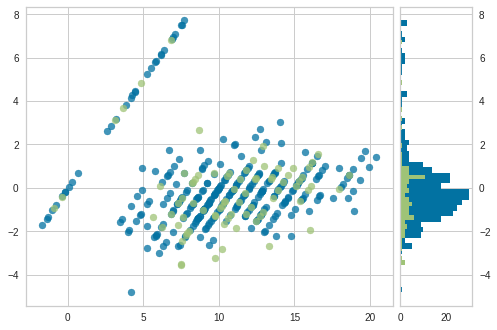

In [ ]:
#?????????? это значит сильная корреляция между признаками?
visualizer = ResidualsPlot(Lasso(alpha = 0.014))
visualizer.fit(X_train_scaled, y_train.iloc[:, 0])
visualizer.score(X_test_scaled, y_test.iloc[:, 0])

### Тестируем качество на тест-сете

*кёрв + SVR

In [ ]:
final_pred = lass_valid.predict(X_test)
print('Качество модели:', metrics.mean_squared_error(y_test, final_pred))

Качество модели: 2.3243767219261895


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


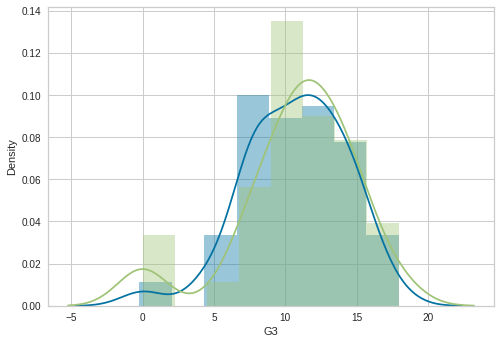

In [ ]:
sns.distplot(final_pred)
sns.distplot(y_test.iloc[:, 0])

### Интерпретация

Дамми-вэриаблы у меня не сработали, надо что-то другое брать. Но скор вроде бы нормальный. В общем я не очень-то понимаю, как интерпретировать полученные результаты). А вообще график повыше, если я правильно понимаю, выглядит, будто модель просто запомнила тренировочные данные.